# The Hilbert–Kunz multiplicity of the quadric hypersurfaces
This notebook intends to illustrate Yoshida's observations in [Yos09]. L

In [74]:
def lam(p,k):
    a = (p-1)/2
    if k>p-1:
        return 'The first argument needs to be a prime and the second must be strictly lesser.'
    l = []
    for i in range(p):
        for j in range(p):
            if j>=i and i+j<=p-1:
                i0 = i
                j0 = j
                x = lambda k: 1 if j0-i0<=k<=i0+j0 else 0
                lij = vector([x(k) for k in range(p)])
                l.append(lij)
            elif j-i >= 0:
                i0 = p-1-j
                j0 = p-1-i
                x = lambda k: 1 if j0-i0<=k<=i0+j0 else 0
                lij = vector([x(k) for k in range(p)])
                l.append(lij)
            else:
                j0 = i
                i0 = j
                if i0+j0<=p-1:
                    x = lambda k: 1 if j0-i0<=k<=i0+j0 else 0
                    lij = vector([x(k) for k in range(p)])
                    l.append(lij)
                else:
                    i1 = p-1-j0
                    j1 = p-1-i0
                    x = lambda k: 1 if j1-i1<=k<=i1+j1 else 0
                    lij = vector([x(k) for k in range(p)])
                    l.append(lij)
    l = [matrix([l[i+p*k] for i in range(p)]).transpose() for k in range(p)]
    return l[k]
def Na(p):
    a = (p-1)/2
    return 2*sum((-1)^k*lam(p,k) for k in range(a))+(-1)^a*lam(p,a)
def Nb(p): #This is the matrix representing k[x]/x^b with T=x^3 over the lam-basis, where b=floor(p/3)
    b = (p-p%3)/3
    print(b,p%3)
    return 3*sum((-1)^k*lam(p,k) for k in range(b)) + (p%3)*(-1)^b*lam(p,b)
def HK1(p,d,matrix = False):
    if p==2:
        raise ValueError("First argument has to be an odd prime number.")
    a = (p-1)/2
    N = Na(p)
    if matrix:
        return N^(d+1)
    return (N^(d+1))[0,0]
def lsharp(p,d,matrix = False):
    a = (p-1)/2
    M = lam(p,a)
    if matrix:
        return M^(d+1)
    return (M^(d+1))[0,0]
def eHKA1(p,d):
    if p == 2: # Characteristic 2
        if d%2==0: # Even dimension
            m = d/2
            return (2^m+1)/2^m
        else: # Odd dimension
            m = (d+1)/2
            return 2^m/(2^m-1)
    else: # Odd characteristic:
        return 1+(HK1(p,d)-p^d)/(p^d-lsharp(p,d))


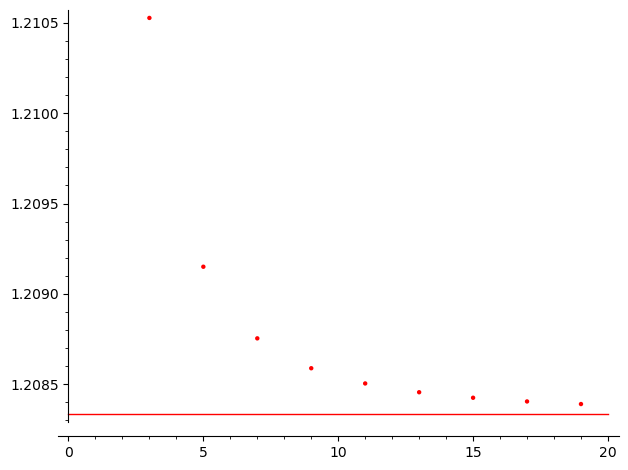

In [75]:
d0 = 4
dmax = d0+1
p0 = 1 #p0 = 0 hace que aparezca el valor en caracteristica 2
pmax = 10
eHKs = [[(2*m+1,eHKA1(2*m+1,d)) for m in range(1,pmax)] for d in range(d0,dmax)]
colors = ['red','orange','yellow','green','blue','purple','pink','brown']
R.<x>=PowerSeriesRing(QQ,'x')
lowerbounds = [1+(1/cos(x)+tan(x))[k] for k in range(d0,dmax)]
(sum(points(eHKs[r],color = colors[r])+plot(lowerbounds[r],(x,0,2*pmax),color = colors[r]) for r in range(dmax-d0))).show()